Objetivos:
    
    • Neste trabalho iremos construir um modelo de machine learn capaz de prever o preço de casas de certo local no estados unidos (Kaggle Dataset).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Load da base

In [ ]:
train = pd.read_csv('train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Analise dos dados

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Tratamento de Outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

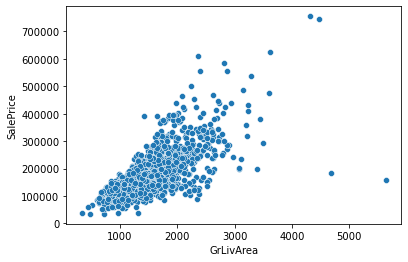

In [ ]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [ ]:
train = train[train['GrLivArea'] < 4000]

## Tratando grande quantidade de valores nulos

<AxesSubplot:>

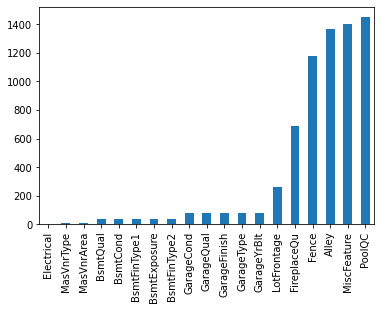

In [ ]:
#Grafico de null por coluna
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

### Analisando colunas com muitosa nullos

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1176
Alley           1365
MiscFeature     1402
PoolQC          1451
dtype: int64

In [ ]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

### Exclui colunas nulas

In [ ]:
#Eliminar colunas com mais de 270 valores null
max_number_of_nas = 270
train = train.loc[:, (train.isnull().sum(axis=0) <= max_number_of_nas)]
train.shape

(1456, 76)

<AxesSubplot:>

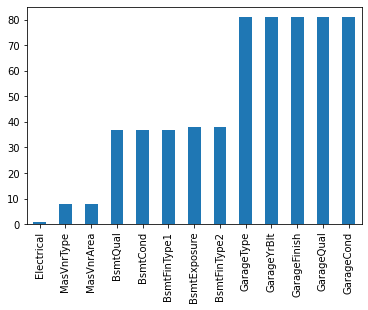

In [ ]:
#Grafico após eliminar colunas
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
col_list = train.columns
for col in col_list:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)

In [ ]:
train = train.drop(columns= 'Id', axis= 1)

## Split da base de treino

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

### Ajuste da variável target

In [ ]:
y = pd.DataFrame(y)
y.shape

(1456, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

## Parse de variáveis categóricas com OneHotEncoder X_train

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
columns_dummy = train.select_dtypes('object').columns
columns_dummy

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
trf_train = ColumnTransformer([
        ('enc', OneHotEncoder(sparse = False, handle_unknown='ignore'), columns_dummy)
    ], remainder ='passthrough')

X_train = pd.DataFrame(trf_train.fit_transform(X_train), columns = trf_train.get_feature_names())
X_train.shape

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(975, 270)

## Parse de variáveis categóricas com OneHotEncoder X_test

In [ ]:
X_test = pd.DataFrame(trf_train.transform(X_test), columns = trf_train.get_feature_names())
X_test.shape

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(481, 270)

# XGBoost

X_train, X_test, y_train, y_test 

In [ ]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 15 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from xgboost import XGBRegressor

In [ ]:
arvores_poderosas = XGBRegressor(learning_rate = 0.015,
                                 n_estimators = 500,
                                 max_depth = 4,
                                 min_child_weight = 2,
                                 subsample = 0.6,
                                 colsample_bynode = 0.05,
                                 num_parallel_tree = 9,
                                 random_state = 0)
arvores_poderosas.fit(X_train,y_train)

predict_xgb = arvores_poderosas.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predict_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
print('MAPE:', round((metrics.mean_absolute_percentage_error(y_test, predict_xgb))*100,2),"%")

MAE: 15715.530275467776
MSE: 587152920.337979
RMSE: 24231.23852257616
MAPE: 9.56 %


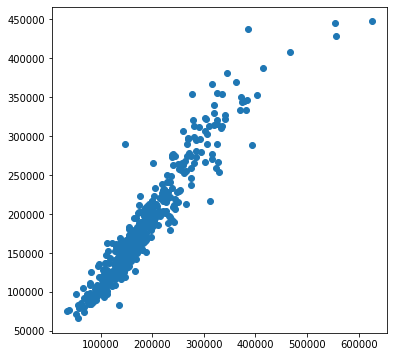

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predict_xgb)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

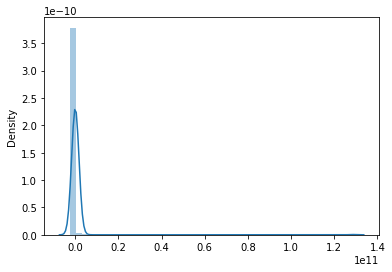

In [ ]:
predict_xgb = pd.DataFrame(predict_xgb)
sns.distplot((y_test-predict))

# Treino com dados de submissão no Kaggle

In [ ]:
test_kaggle = pd.read_csv('./test.csv')
test_kaggle.shape

(1459, 80)

In [ ]:
X_test_kaggle = pd.DataFrame(trf_train.transform(X_test_kaggle), columns = trf_train.get_feature_names())
X_test_kaggle.shape

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1459, 270)

In [ ]:
predict_xgb_kaggle = arvores_poderosas.predict(X_test_kaggle)

In [ ]:
predict_kaggle = pd.DataFrame(predict_xgb_kaggle, columns=['SalePrice'])

In [ ]:
predict_kaggle = test_kaggle.join(predict_kaggle)
predict_kaggle.shape

(1459, 81)

In [ ]:
kaggle_submmit = predict_kaggle[['Id','SalePrice']]

In [ ]:
kaggle_submmit

,Id,SalePrice
0,1461,126680.484375
1,1462,157799.765625
2,1463,181899.656250
3,1464,190923.781250
4,1465,189137.671875
...,...,...
1454,2915,94088.648438
1455,2916,93161.546875
1456,2917,164716.828125
1457,2918,126441.960938


In [ ]:
kaggle_submmit.to_csv('predict_price_houses.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5ef69f3c-6965-46e0-8644-3bfe3dd320c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>